In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Agrupamiento por división

Otra de las formas en que se puede agrupar un conjunto de datos es ir formando divisiones hasta obtener una que se ajuste a nuestras necesidades. Se inicia con el conjunto de datos formando un único cluster y se va dividiendo poco a poco hasta formar el número deseado de particiones. En este ejercicio veremos al método `BisectingKMeans` que usa parámetros similares a `KMeans`. Primero creamos nuestro conjunto de datos con `make_blobs`.

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs

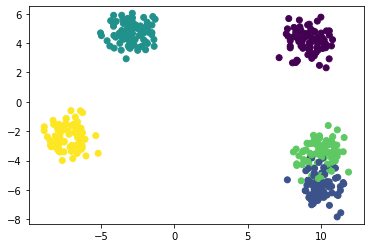

In [42]:
k = 5
X, y = make_blobs(400, 2, centers=k, cluster_std=.8, random_state=24 )
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Y aplicamos los algoritmos para una comparación rápida.

C:\Users\msubr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


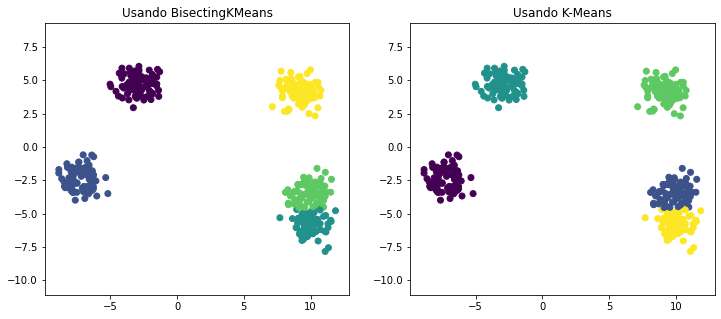

In [43]:
algo = [[BisectingKMeans, "BisectingKMeans"], [KMeans, "K-Means"]]
_, ax = plt.subplots(1, 2, figsize=(12, 5))
for i, alg in enumerate(algo):
    cl = alg[0](k)
    y = cl.fit_predict(X)
    ax[i].set_title(f"Usando {alg[1]}")
    ax[i].axis('equal')
    ax[i].scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Podemos ver que en este caso, dos de los cluster quedaron muy juntos pero ambos algoritmos crearon muy bien los clusters.

Veamos un ejemplo donde todos los clusters están muy cerca unos de otros.

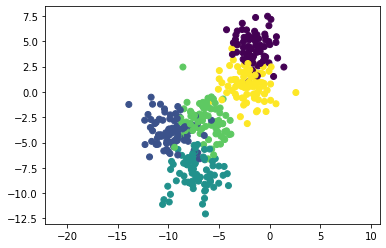

In [5]:
k = 5
X, y = make_blobs(400, 2, centers=k, cluster_std=1.4, random_state=1 )
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

C:\Users\msubr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


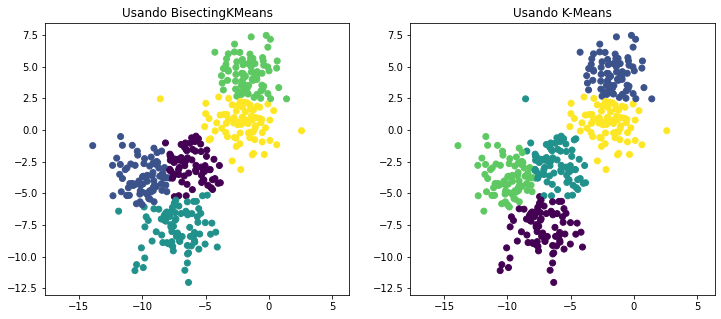

In [6]:
algo = [[BisectingKMeans, "BisectingKMeans"], [KMeans, "K-Means"]]
_, ax = plt.subplots(1, 2, figsize=(12, 5))
for i, alg in enumerate(algo):
    cl = alg[0](k)
    y = cl.fit_predict(X)
    ax[i].set_title(f"Usando {alg[1]}")
    ax[i].axis('equal')
    ax[i].scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Podemos ver que en este caso ambos métodos lograron una separación similar. 

Por último, veremos la diferencia cuando tenemos un único cluster y se va dividiendo en 2, 4, 8 y 16 particiones. Podemos notar que en el caso de `BisectingKMeans`, las particiones son más regulares en sus formas.

C:\Users\msubr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msubr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msubr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msubr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

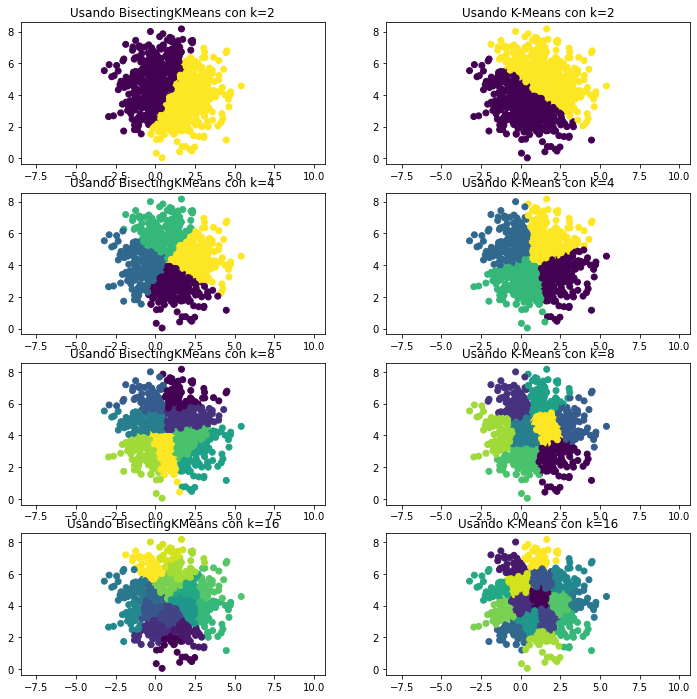

In [7]:
X, y = make_blobs(1000, 2, centers=1, cluster_std=1.4, random_state=0 )

algo = [[BisectingKMeans, "BisectingKMeans"], [KMeans, "K-Means"]]
K = [2,4,8,16]

_, ax = plt.subplots(4, 2, figsize=(12, 12))
for j, k in enumerate(K):
    for i, alg in enumerate(algo):
        cl = alg[0](k)
        y = cl.fit_predict(X)
        ax[j,i].set_title(f"Usando {alg[1]} con k={k}")
        ax[j,i].axis('equal')
        ax[j,i].scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Recuerde que el mejor método depende del conjunto de datos y de lo que se quiera lograr al crear los cluster. Se recomienda probar varios métodos y elegir el más conveninte.